Is it a Bird, Tiger or a Turtle

This is modification of lesson 1 code 'Is it a bird?' of Practical Deep Learning for Coders from fast.ai.


In [1]:
!pip install -Uqq fastai duckduckgo_search==3.5.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.7/232.7 kB 2.1 MB/s eta 0:00:00


In [2]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [3]:
#NB: `search_images` depends on duckduckgo.com, which doesn't always return correct responses.
#    If you get a JSON error, just try running it again (it may take a couple of tries).
urls = search_images('bird photos', max_images=1)
urls[0]

Searching for 'bird photos'


/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


'https://images.pexels.com/photos/326900/pexels-photo-326900.jpeg?cs=srgb&dl=wood-flight-bird-326900.jpg&fm=jpg'

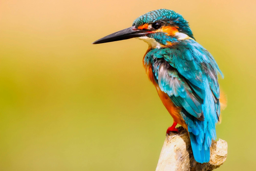

In [4]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

In [5]:
#NB: `search_images` depends on duckduckgo.com, which doesn't always return correct responses.
#    If you get a JSON error, just try running it again (it may take a couple of tries).
urls = search_images('tiger photos', max_images=1)
urls[0]

'https://static.pexels.com/photos/162173/panthera-tigris-altaica-tiger-siberian-amurtiger-162173.jpeg'

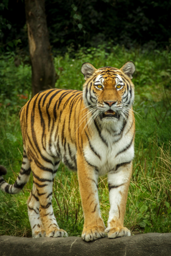

In [6]:
from fastdownload import download_url
dest = 'tiger.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

In [7]:
#NB: `search_images` depends on duckduckgo.com, which doesn't always return correct responses.
#    If you get a JSON error, just try running it again (it may take a couple of tries).
urls = search_images('turtle photos', max_images=1)
urls[0]

Searching for 'turtle photos'


'https://www.americanoceans.org/wp-content/uploads/2021/01/green-sea-turtle-chelonia-scaled.jpg'

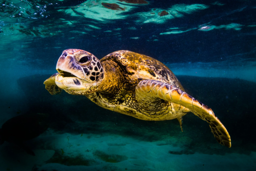

In [8]:
from fastdownload import download_url
dest = 'turtle.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

In [9]:
searches = 'bird','tiger','turtle'
path = Path('bird_or_tiger_turtle')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'bird photo'


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Searching for 'bird sun photo'
Searching for 'bird shade photo'
Searching for 'tiger photo'
Searching for 'tiger sun photo'
Searching for 'tiger shade photo'
Searching for 'turtle photo'
Searching for 'turtle sun photo'
Searching for 'turtle shade photo'


In [10]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

8

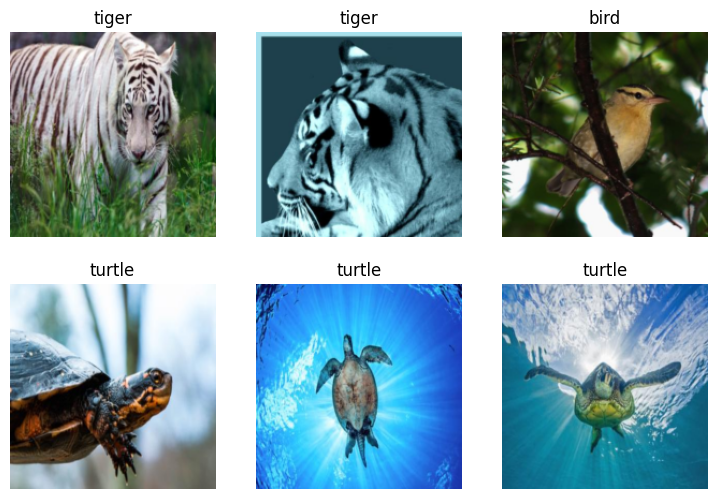

In [11]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [12]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 83.1MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.559563,0.241422,0.083333,00:28


epoch,train_loss,valid_loss,error_rate,time
0,0.222235,0.100294,0.041667,00:39
1,0.151521,0.062199,0.020833,00:39
2,0.102738,0.051514,0.020833,00:39


In [13]:
is_tiger,_,probs = learn.predict(PILImage.create('tiger.jpg'))
print(f"This is a: {is_tiger}.")
print(f"Probability it's a tiger: {probs[0]:.4f}")
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")
is_turtle,_,probs = learn.predict(PILImage.create('turtle.jpg'))
print(f"This is a: {is_turtle}.")
print(f"Probability it's a turtle: {probs[0]:.4f}")

This is a: tiger.
Probability it's a tiger: 0.0000


This is a: bird.
Probability it's a bird: 1.0000


This is a: turtle.
Probability it's a turtle: 0.0000
